In [37]:
import subprocess
import os
import time
import matplotlib.pyplot as plt
import numpy as np

# Set the OMP_NUM_THREADS environment variable
num_threads = 32
os.environ["OMP_NUM_THREADS"] = str(num_threads)

Nmin = 100
Nmax = 10**12

num_list = []
value = Nmin

while value <= Nmax:
    num_list.append(value)
    value *= 10

# List to store execution times
execution_times = []
output_list = []

for N in num_list:

    # Run the Python code and capture the output
    start_time = time.time()
    output = subprocess.check_output(["python", "pi_mc.py", "-p", str(num_threads), "-n", str(N)], universal_newlines=True)

    # Append the output to the list
    output_list.append(output)
    print(output)

    end_time = time.time()

    # Calculate and store the execution time
    execution_time = end_time - start_time
    execution_times.append(execution_time)


Estimated value of Pi = 2.960000000000

Estimated value of Pi = 3.116000000000

Estimated value of Pi = 3.157600000000

Estimated value of Pi = 3.150760000000

Estimated value of Pi = 3.140860000000

Estimated value of Pi = 3.142372800000

Estimated value of Pi = 3.141508280000

Estimated value of Pi = 3.141616232000

Estimated value of Pi = 3.141586098400

Estimated value of Pi = 3.141589239680

Estimated value of Pi = 3.141591983784



In [38]:
numerical_values = [float(s.split('=')[1]) for s in output_list]
print(numerical_values)

[2.96, 3.116, 3.1576, 3.15076, 3.14086, 3.1423728, 3.14150828, 3.141616232, 3.1415860984, 3.14158923968, 3.141591983784]


In [46]:
import pandas as pd

# Create a DataFrame from the list of lists
table_data = []
for i in range(len(num_list)):
    table_data.append([num_list[i], numerical_values[i]])

df = pd.DataFrame(table_data, columns=['Number of threads', 'Pi'])

# Set the option to display 15 digits accuracy
pd.set_option('display.precision', 16)

# Print the table
print(df.to_string(index=False))


 Number of threads                 Pi
               100 2.9600000000000000
              1000 3.1160000000000001
             10000 3.1576000000000000
            100000 3.1507600000000000
           1000000 3.1408600000000000
          10000000 3.1423728000000000
         100000000 3.1415082800000000
        1000000000 3.1416162320000001
       10000000000 3.1415860983999999
      100000000000 3.1415892396800000
     1000000000000 3.1415919837840001


In [40]:
difference = [value - np.pi for value in numerical_values]
print(difference)


[-0.18159265358979315, -0.025592653589793013, 0.016007346410206846, 0.009167346410206889, -0.0007326535897931308, 0.00078014641020685, -8.437358979307419e-05, 2.3578410206948064e-05, -6.5551897932003556e-06, -3.4139097930818707e-06, -6.698057930520918e-07]


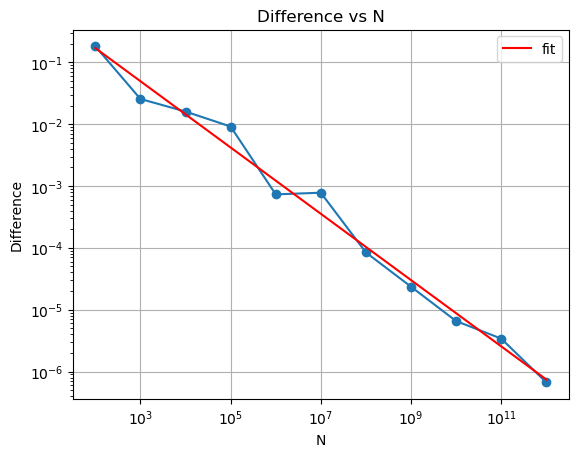

In [44]:
plt.plot(num_list, np.abs(difference), marker='o')
plt.xscale('log')  # Set the x-axis scale to logarithmic
plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.xlabel('N')
plt.ylabel('Difference')
plt.title('Difference vs N')
plt.grid(True)

# Calculate the coefficients of the line
coefficients = np.polyfit(np.log10(num_list), np.log10(np.abs(difference)), 1)
slope = coefficients[0]
intercept = coefficients[1]

# Create the x and y values for the line
x_line = np.logspace(np.log10(min(num_list)), np.log10(max(num_list)), 100)
y_line = 10**(slope * np.log10(x_line) + intercept)

# Plot the line
plt.plot(x_line, y_line, color='red', label='fit')

plt.legend()
plt.show()

In [45]:
convergence_rate = slope
print(convergence_rate)


-0.5358777509670519


The result confirms the anticipate convergence rate of Monte Carlo
$$ {\rm error} \sim O(N^{-1/2})$$